### Q1(a)
In the dataset, ‘-’, ‘--’, and ‘?’ are considered as missing values, and the variable columns of the dataset are noted as in the data dictionary in order. As part of data preparation, read the dataset in as a Pandas dataframe, with the above considerations.

In [1]:
import pandas as pd

missval = ['-', '--', '?']
df = pd.read_csv('GBA_data.csv', na_values = missval, low_memory = False)

In [2]:
df.head()

,origin,destination,start,end,id,type,subscriber,yob,age,gender
0,316.0,311.0,2022-01-01 00:07:41.040,2022-01-01 00:10:06.241,2473,Concession,No,1957.0,63.0,Male
1,74.0,70.0,2022-01-01 00:07:52.943,2022-01-01 00:19:47.075,2423,Regular,No,1986.0,34.0,Male
2,97.0,125.0,2022-01-01 00:09:31.745,2022-01-01 00:28:43.159,3455,Regular,No,1992.0,28.0,Male
3,11.0,323.0,2022-01-01 00:14:37.187,2022-01-01 00:37:16.445,2173,Ad-Hoc,No,1995.0,25.0,Male
4,17.0,8.0,2022-01-01 00:15:33.369,2022-01-01 00:58:56.522,1788,Regular,Yes,1994.0,26.0,Male


In [3]:
df.describe()

,origin,destination,id,yob,age
count,669505.000000,669505.000000,670009.000000,669999.000000,669999.000000
mean,113.350947,111.389453,2174.952754,1982.236818,37.763182
std,94.125066,93.750900,1183.285391,9.901383,9.901383
min,3.000000,3.000000,11.000000,1949.000000,20.000000
25%,31.000000,30.000000,1177.000000,1977.000000,31.000000
50%,84.000000,81.000000,2265.000000,1984.000000,36.000000
75%,178.000000,178.000000,3188.000000,1989.000000,43.000000
max,356.000000,356.000000,4307.000000,2000.000000,71.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670009 entries, 0 to 670008
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   origin       669505 non-null  float64
 1   destination  669505 non-null  float64
 2   start        670009 non-null  object 
 3   end          670009 non-null  object 
 4   id           670009 non-null  int64  
 5   type         669999 non-null  object 
 6   subscriber   670009 non-null  object 
 7   yob          669999 non-null  float64
 8   age          669999 non-null  float64
 9   gender       670006 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 51.1+ MB


In [5]:
df.shape

(670009, 10)

### Q1(b)
Identify the variable columns which have missing values. As part of data preparation, implement ways to treat them, and explain your rationale. State any interesting observation(s).

In [6]:
# Identify which variable columns have missing values.
df.isnull().any()

origin          True
destination     True
start          False
end            False
id             False
type            True
subscriber     False
yob             True
age             True
gender          True
dtype: bool

In [7]:
# Identify number of missing values in each variable columns.
df.isnull().sum()

origin         504
destination    504
start            0
end              0
id               0
type            10
subscriber       0
yob             10
age             10
gender           3
dtype: int64

In [8]:
# Display rows with missing vales to look for interesting observations.
missrow = df.isnull().any(axis = 1)
df.loc[missrow[missrow == True].index]

,origin,destination,start,end,id,type,subscriber,yob,age,gender
7000,200.0,7.0,2022-01-04 08:20:15.413,2022-01-04 08:31:48.928,666,Regular,No,1977.0,43.0,NaN
7001,27.0,49.0,2022-01-04 08:20:24.228,2022-01-04 08:26:01.187,3623,Regular,No,1983.0,37.0,NaN
7002,200.0,163.0,2022-01-04 08:20:24.595,2022-01-04 08:27:42.796,238,Regular,No,1987.0,33.0,NaN
18000,63.0,40.0,2022-01-09 19:15:27.667,2022-01-09 19:31:14.179,2157,Regular,No,NaN,NaN,Female
18001,127.0,96.0,2022-01-09 19:15:40.572,2022-01-09 19:22:14.166,610,Regular,No,NaN,NaN,Male
...,...,...,...,...,...,...,...,...,...,...
669796,NaN,NaN,2022-06-18 17:29:04.854,2022-06-18 17:39:17.982,4091,Regular,No,1991.0,29.0,Female
669871,NaN,NaN,2022-06-18 17:33:35.380,2022-06-18 17:40:28.946,4131,Regular,No,1970.0,50.0,Male
669891,NaN,NaN,2022-06-18 17:35:09.841,2022-06-18 17:40:36.871,4245,Regular,No,1989.0,31.0,Male
669901,NaN,NaN,2022-06-18 17:35:56.846,2022-06-18 17:41:06.626,4117,Regular,No,1975.0,45.0,Male


In [9]:
# Way to treat 'origin' & 'destination' is to delete the entire observations.
df = df.dropna(axis = 0, subset = ('origin', 'destination'))

In [10]:
# Check if deleted (670,009 - 504 = 669,505) (DON'T INCLUDE IN ANSWER)
df.shape

(669505, 10)

In [11]:
# Check if replace() works (DON'T INCLUDE IN ANSWER)
print(df['yob'].mean())
print(df['age'].mean())

1982.2343841253482
37.76561587465179


In [12]:
# Way to treat 'yob' & 'age' is to replace them by their mean/average.
import numpy as np

df['yob'].replace([np.nan], df['yob'].mean(), inplace = True)
df['age'].replace([np.nan], df['age'].mean(), inplace = True)

In [12]:
# Check if replace() works (DON'T INCLUDE IN ANSWER)
df.isnull().sum()

origin          0
destination     0
start           0
end             0
id              0
type           10
subscriber      0
yob            10
age            10
gender          3
dtype: int64

In [13]:
# Check if replace() works (DON'T INCLUDE IN ANSWER)
df.iloc[17997:18002]

,origin,destination,start,end,id,type,subscriber,yob,age,gender
17997,15.0,81.0,2022-01-09 19:15:04.736,2022-01-09 19:24:50.903,2898,Regular,No,1986.0,34.0,Female
17998,59.0,100.0,2022-01-09 19:15:26.411,2022-01-09 19:20:30.102,1992,Regular,No,1988.0,32.0,Male
17999,5.0,81.0,2022-01-09 19:15:27.436,2022-01-09 19:25:25.676,209,Regular,No,1993.0,27.0,Male
18000,63.0,40.0,2022-01-09 19:15:27.667,2022-01-09 19:31:14.179,2157,Regular,No,NaN,NaN,Female
18001,127.0,96.0,2022-01-09 19:15:40.572,2022-01-09 19:22:14.166,610,Regular,No,NaN,NaN,Male


### Q1(c)
As part of data preparation, identify three (3) other data quality issues in the data. Similarly, suggest and implement ways to treat them, and explain your rationale.

In [15]:
# 1st data quality issue is Inappropriate Datatype.
# Identifying the original type of datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669505 entries, 0 to 670007
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   origin       669505 non-null  float64
 1   destination  669505 non-null  float64
 2   start        669505 non-null  object 
 3   end          669505 non-null  object 
 4   id           669505 non-null  int64  
 5   type         669495 non-null  object 
 6   subscriber   669505 non-null  object 
 7   yob          669505 non-null  float64
 8   age          669505 non-null  float64
 9   gender       669502 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 56.2+ MB


In [16]:
# Changing datatype based on its column properties.
df['origin'] = df['origin'].astype('int64')
df['destination'] = df['destination'].astype('int64')
df['start'] = df['start'].astype('object')
df['end'] = df['end'].astype('object')
df['id'] = df['id'].astype('int64')
df['type'] = df['type'].astype('object')
df['subscriber'] = df['subscriber'].astype('object')
df['yob'] = df['yob'].astype('int64')
df['age'] = df['age'].astype('int64')
df['gender'] = df['gender'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669505 entries, 0 to 670007
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   origin       669505 non-null  int64 
 1   destination  669505 non-null  int64 
 2   start        669505 non-null  object
 3   end          669505 non-null  object
 4   id           669505 non-null  int64 
 5   type         669495 non-null  object
 6   subscriber   669505 non-null  object
 7   yob          669505 non-null  int64 
 8   age          669505 non-null  int64 
 9   gender       669502 non-null  object
dtypes: int64(5), object(5)
memory usage: 56.2+ MB


In [17]:
# Check if change of datatype works (DON'T INCLUDE IN ANSWER)
df.iloc[17997:18002]

,origin,destination,start,end,id,type,subscriber,yob,age,gender
17997,15,81,2022-01-09 19:15:04.736,2022-01-09 19:24:50.903,2898,Regular,No,1986,34,Female
17998,59,100,2022-01-09 19:15:26.411,2022-01-09 19:20:30.102,1992,Regular,No,1988,32,Male
17999,5,81,2022-01-09 19:15:27.436,2022-01-09 19:25:25.676,209,Regular,No,1993,27,Male
18000,63,40,2022-01-09 19:15:27.667,2022-01-09 19:31:14.179,2157,Regular,No,1982,37,Female
18001,127,96,2022-01-09 19:15:40.572,2022-01-09 19:22:14.166,610,Regular,No,1982,37,Male


In [14]:
# 2nd data quality issue is Duplicate Data.
# Identifying data with similar 'origin' and 'destination'.
res = []
for i, j in zip(df['origin'], df['destination']):
    if i == j:
        res.append(i)

# Print the number of data with similar 'origin' and 'destination'.
print("Total number of orgin and destinaion are equal in",len(res),"entries")

Total number of orgin and destinaion are equal in 14686 entries


In [15]:
# Removal of data with similar 'origin' and 'destination'.
df = df[df.destination != df.origin]
# df = df[df.start != df.end]   # what is this for?

res = []
for i, j in zip(df['origin'], df['destination']):
    if i == j:
        res.append(i)

# Print the number of data with similar 'origin' and 'destination'.
print("Total number of orgin and destinaion are equal in",len(res),"entries")

Total number of orgin and destinaion are equal in 0 entries


In [20]:
# Check if deleted (669,505 - 14,686 = 654,819) (DON'T INCLUDE IN ANSWER)
df.shape

(654819, 10)

In [16]:
# 3rd data quality issue is Outdated Information.
from datetime import date

current_year = date.today().year
print(current_year)
type(current_year)

2022


int

In [17]:
# Updating 'age'
df.dropna(subset = ['yob', 'age'])
df['yob']
df['age'] = current_year - df['yob']
print(df['age'])
df2 = df.dropna(subset=['yob', 'age'])
# print(df2)
df2

0         65.0
1         36.0
2         30.0
3         27.0
4         28.0
          ... 
670003    37.0
670004    44.0
670005    34.0
670006    42.0
670007    45.0
Name: age, Length: 654819, dtype: float64


,origin,destination,start,end,id,type,subscriber,yob,age,gender
0,316.0,311.0,2022-01-01 00:07:41.040,2022-01-01 00:10:06.241,2473,Concession,No,1957.0,65.0,Male
1,74.0,70.0,2022-01-01 00:07:52.943,2022-01-01 00:19:47.075,2423,Regular,No,1986.0,36.0,Male
2,97.0,125.0,2022-01-01 00:09:31.745,2022-01-01 00:28:43.159,3455,Regular,No,1992.0,30.0,Male
3,11.0,323.0,2022-01-01 00:14:37.187,2022-01-01 00:37:16.445,2173,Ad-Hoc,No,1995.0,27.0,Male
4,17.0,8.0,2022-01-01 00:15:33.369,2022-01-01 00:58:56.522,1788,Regular,Yes,1994.0,28.0,Male
...,...,...,...,...,...,...,...,...,...,...
670003,61.0,22.0,2022-06-18 17:42:30.437,2022-06-18 17:55:04.850,3391,Regular,No,1985.0,37.0,Male
670004,89.0,30.0,2022-06-18 17:42:34.601,2022-06-18 17:47:38.890,558,Regular,No,1978.0,44.0,Male
670005,113.0,110.0,2022-06-18 17:42:37.555,2022-06-18 17:44:43.645,1243,Regular,No,1988.0,34.0,Male
670006,109.0,121.0,2022-06-18 17:42:44.010,2022-06-18 17:44:31.715,2403,Regular,No,1980.0,42.0,Male


### Q1(d)
Develop a user-defined function that will print the hour, expressed in the 12-hour clock format (e.g., 12am, 1pm), whereby the highest number of commuters start their journey.

In [18]:
from datetime import datetime

def GetHighestNumberofCommuters(start_time):
    start_hour = []

    for i in start_time:
        hour = datetime.strptime(i, "%Y-%m-%d %H:%M:%S.%f").hour
        start_hour.append(hour)

    time_dict = {}

    for time in start_hour:
        if time == 0:
          twelve_hr_format = '12am'
        elif 1 <= time <= 11:
          twelve_hr_format = str(time) + 'am'
        elif time == 12:
          twelve_hr_format = '12pm'
        else:
          twelve_hr_format = str(time - 12) + 'pm'
        try:
            time_dict[twelve_hr_format] += 1
        except:
            time_dict[twelve_hr_format] = 1

    highest = max(time_dict, key = time_dict.get)
    return highest

In [19]:
print("Highest number of commuters start their journey at",GetHighestNumberofCommuters(start_time = df['start']))

Highest number of commuters start their journey at 5pm


### Q1(e)
Write a Python code to create appropriate visualisations of the commuter data. Analyse the results and then discuss three (3) interesting insights.

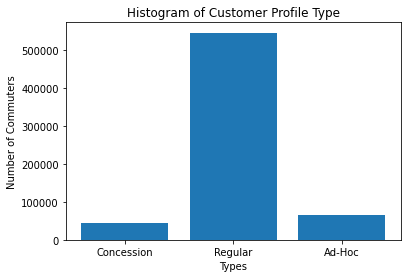

In [21]:
# Histogram of customer profile type
import matplotlib.pyplot as plt
df = df.dropna()
type_data = {}

for i in df['type']:
    type_data[str(i)] = 0

for i in df['type']:
    type_data[str(i)] = type_data[str(i)] + 1

type_data
plt.title('Histogram of Customer Profile Type')
plt.xlabel('Types')
plt.ylabel('Number of Commuters')
type_data_names = list(type_data.keys())
type_data_values = list(type_data.values())
plt.bar(range(len(type_data)), type_data_values, tick_label = type_data_names)
plt.show()

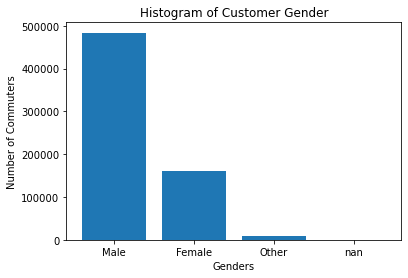

In [26]:
# Histogram of customer gender
type_data = {}

for i  in df['gender']:
    type_data[str(i)] = 0

for i  in df['gender']:
    type_data[str(i)] = type_data[str(i)] + 1

type_data
type_data_names = list(type_data.keys())
type_data_values = list(type_data.values())
plt.title('Histogram of Customer Gender')
plt.xlabel('Genders')
plt.ylabel('Number of Commuters')
plt.bar(range(len(type_data)), type_data_values, tick_label = type_data_names)
plt.show()

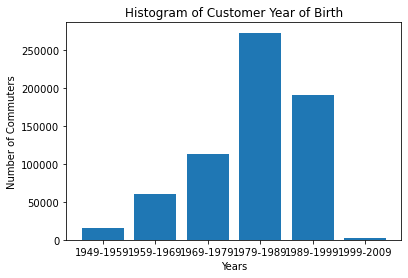

In [27]:
# Histogram of customer year of birth
type_data = {'1949-1959':0,'1959-1969':0,'1969-1979':0,'1979-1989':0,'1989-1999':0,'1999-2009':0}

for i  in df['yob']:
    if i < 1959:
        type_data[str('1949-1959')] = type_data[str('1949-1959')] + 1
    elif ((i >=1959) and (i<1969)):
        type_data[str('1959-1969')] = type_data[str('1959-1969')] + 1
    elif ((i >=1969) and (i<1979)):
        type_data[str('1969-1979')] = type_data[str('1969-1979')] + 1
    elif ((i >=1979) and (i<1989)):
        type_data[str('1979-1989')] = type_data[str('1979-1989')] + 1
    elif ((i >=1989) and (i<1999)):
        type_data[str('1989-1999')] = type_data[str('1989-1999')] + 1
    elif ((i >=1999) and (i<2009)):
        type_data[str('1999-2009')] = type_data[str('1999-2009')] + 1

type_data
type_data_names = list(type_data.keys())
type_data_values = list(type_data.values())
plt.title('Histogram of Customer Year of Birth')
plt.xlabel('Years')
plt.ylabel('Number of Commuters')
plt.bar(range(len(type_data)), type_data_values, tick_label = type_data_names)
plt.show()